In [4]:
!pip install autokeras
!pip install tensorflow==2.4.0

!pip install tensorflow-gpu==2.4.0

In [5]:
import numpy as np
import autokeras
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
# from tensorflow import keras

import autokeras as ak

# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.allow_growth = True
# sess = InteractiveSession(config=config)
# sess.InteractiveSession.close()
# InteractiveSession.close()


In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# print(x_train.shape)  # (60000, 28, 28)
# print(y_train.shape)  # (60000,)
# print(y_train[:3])  # array([7, 2, 1], dtype=uint8)


4423680/4422102 [==============================] - 0s 0us/step


In [7]:
# Initialize the image classifier.
clf = ak.ImageClassifier(overwrite=True, max_trials=2)
# Feed the image classifier with training data.
clf.fit(x_train, y_train, epochs=10)


# Predict with the best model.
predicted_y = clf.predict(x_test)
print(predicted_y)


# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))


Trial 2 Complete [00h 44m 18s]
val_loss: 0.27781203389167786

Best val_loss So Far: 0.22076644003391266
Total elapsed time: 00h 45m 41s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5482 - accuracy: 0.8027
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3173 - accuracy: 0.8869
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2757 - accuracy: 0.8998
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2545 - accuracy: 0.9071
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2407 - accuracy: 0.9118
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2275 - accuracy: 0.9162
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2206 - accuracy: 0.9178
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2092 - accuracy: 0.9219
Epoch 9/10

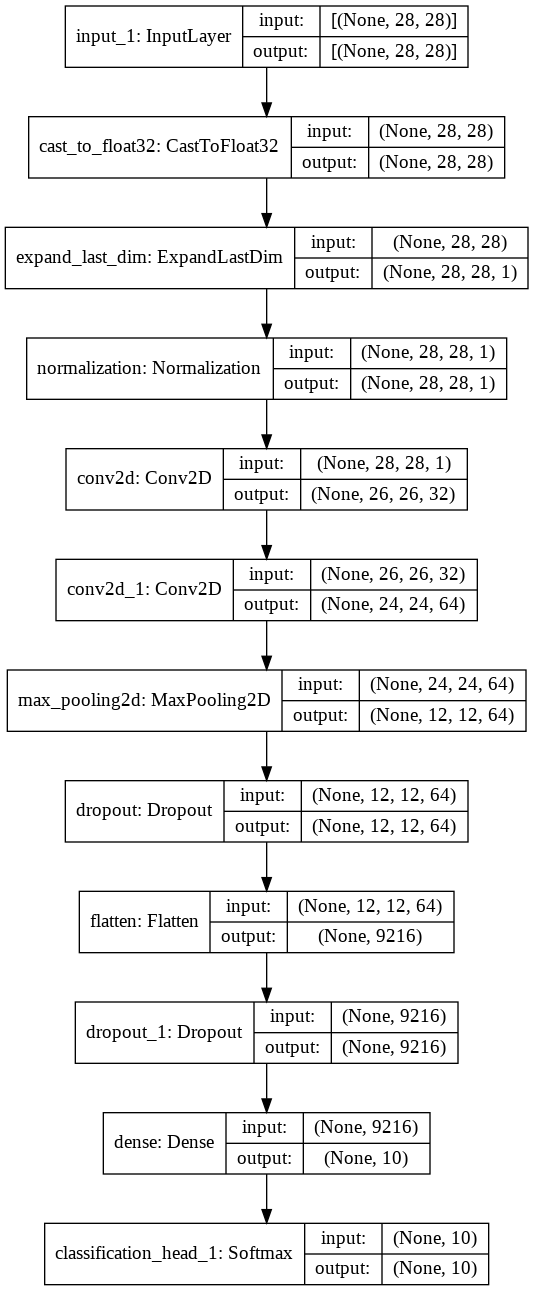

In [8]:
model = clf.export_model()

tf.keras.utils.plot_model(model, show_shapes=True)

In [9]:

!mkdir -p saved_model
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [10]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 28, 28)            0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 28, 28, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 28, 28, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0     

In [11]:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp